In [1]:
%matplotlib inline
import geopandas as gpd
 
import sys
sys.path.insert(0, "../")
from weavingspace import WeaveUnit
from weavingspace import Tiling

**Note: to speed up the tilings make the spacing larger (it's in metres) and set aspect to 1 (the latter will double the speed more or less).**

In [2]:
ak = gpd.read_file("data/imd-auckland-2018.gpkg")

## Biaxial weave

<Axes: >

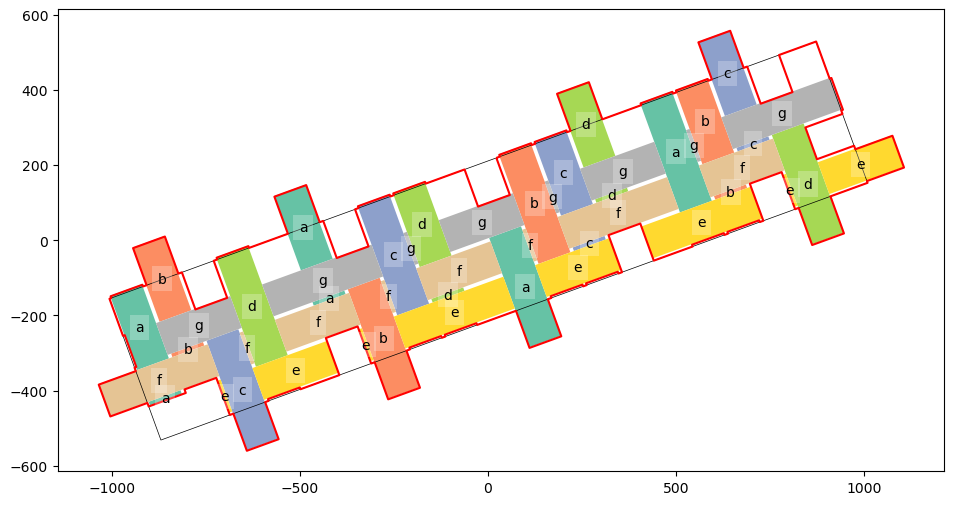

In [3]:
w1 = WeaveUnit(weave_type = "twill", n = 2, spacing = 100, aspect = .9,
               strands = "abcd-|efg-", crs = ak.crs).transform_rotate(20)#.inset_tiles(1)
w1.plot(r = 0, cmap = "Set2", figsize = (18, 6))

In [4]:
weave1 = Tiling(w1, ak)

Initialising Tiling: 4.577450454235077e-07
Indexing the region: 0.006301249843090773
Forming the region union: 0.15858304221183062
Building the grid: 0.20321733318269253
Making the tiles: 1.267995999660343
Indexing the tiles: 0.008340958040207624


In [5]:
textile1 = weave1.get_tiled_map(debug = True,
                                join_on_prototiles = False)

STEP 1: prep data (rotation if requested): 0.010
STEP A2: overlay zones with tiling: 0.949
STEP A3: calculate areas: 0.002
STEP A4: drop columns prior to join: 0.001
STEP A5: build lookup for join: 0.143
STEP A6: perform lookup join: 0.005


In [6]:
textile1.vars_to_map = [x for x in ak.columns if "Rank" in x]
textile1.colors_to_use = ("BrBG", "RdGy", "RdYlBu", "Spectral","PiYG",   
                                "PRGn", "PuOr")

No tile ids provided: setting all of them!
Setting defaults for the 'categoricals' attribute of the map.


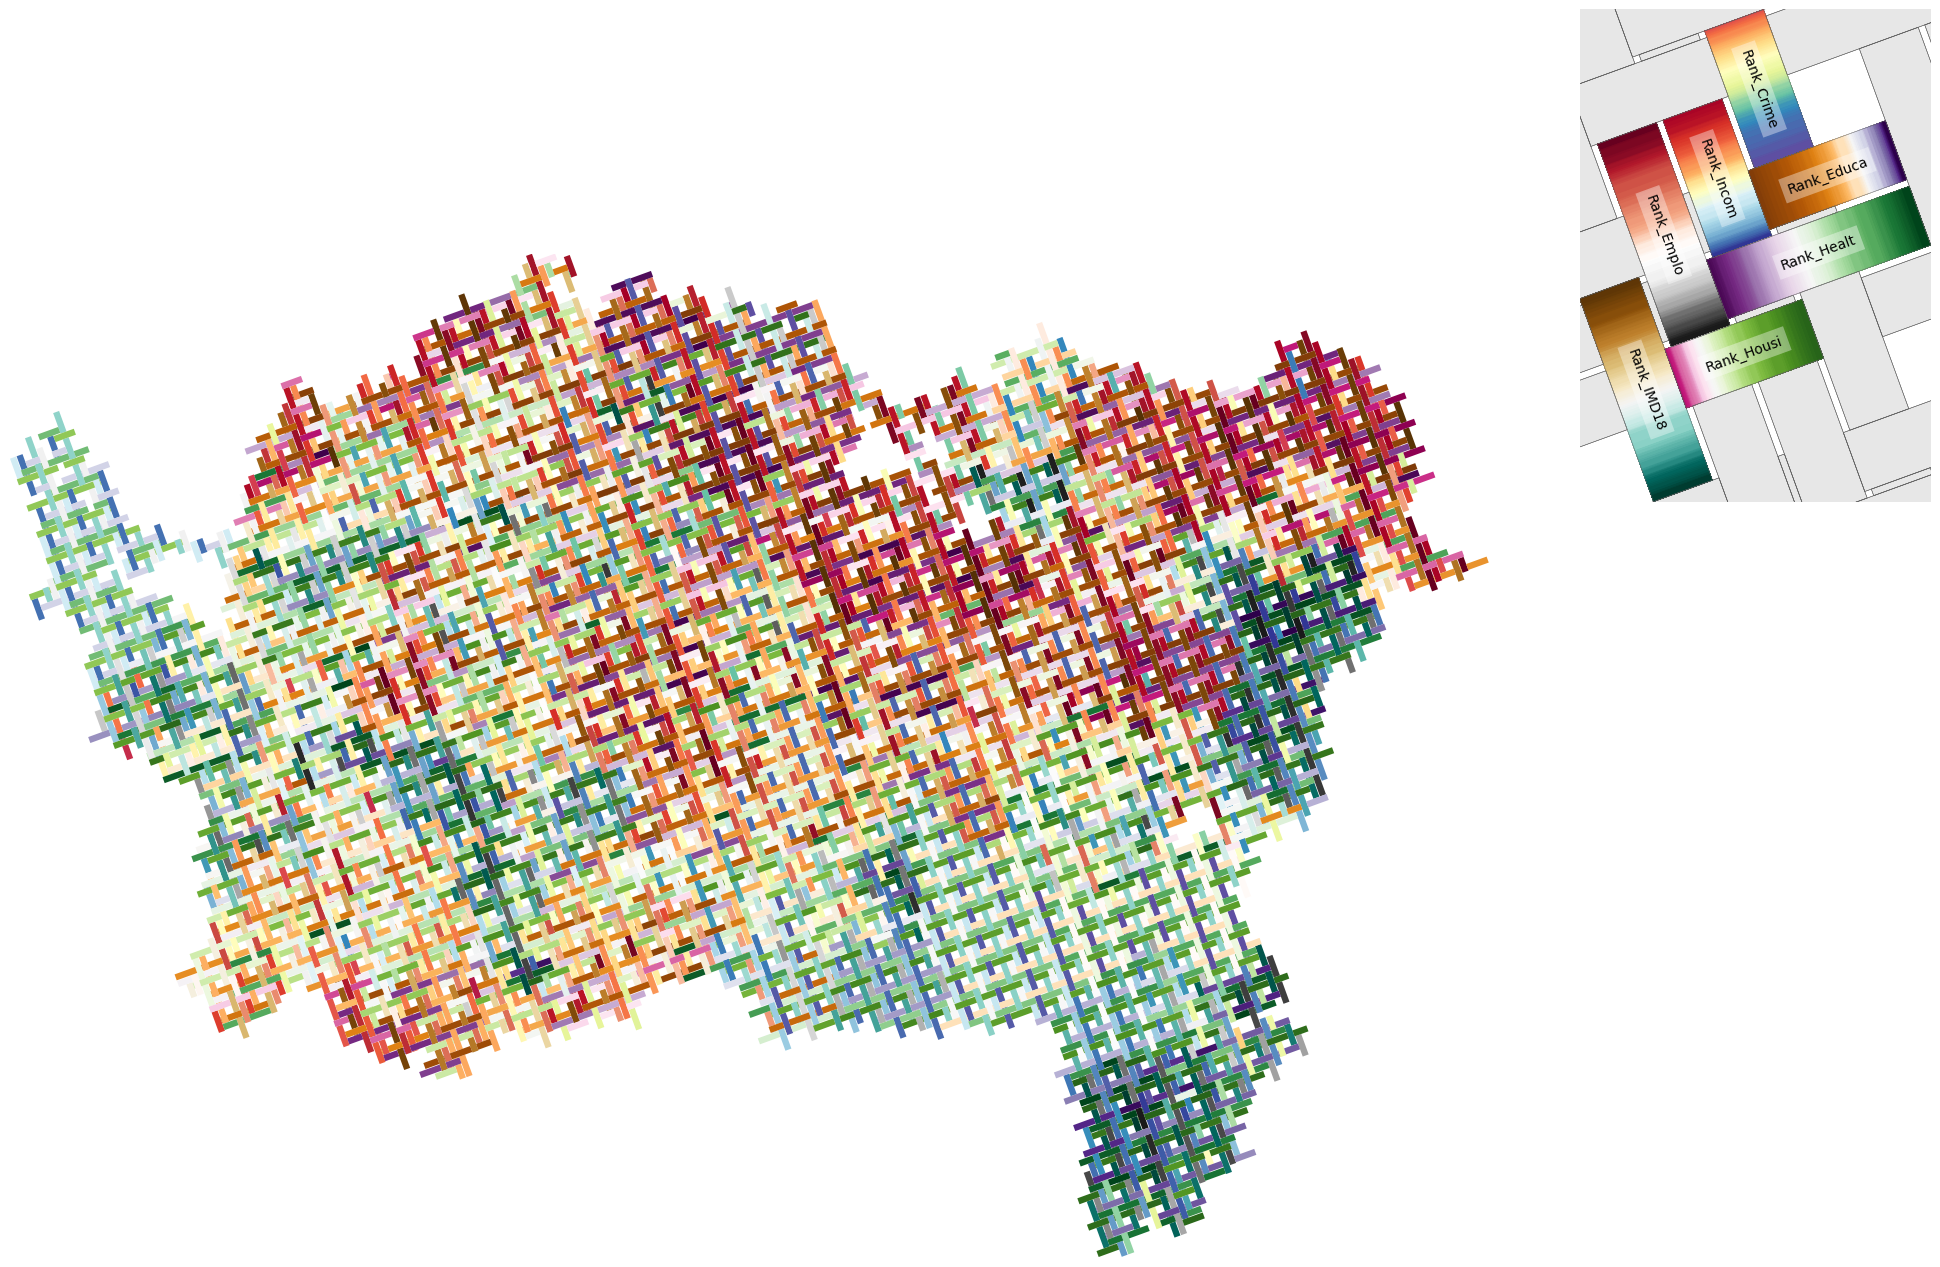

In [7]:
fig = textile1.render(legend = True)

## Triaxial weave

<Axes: >

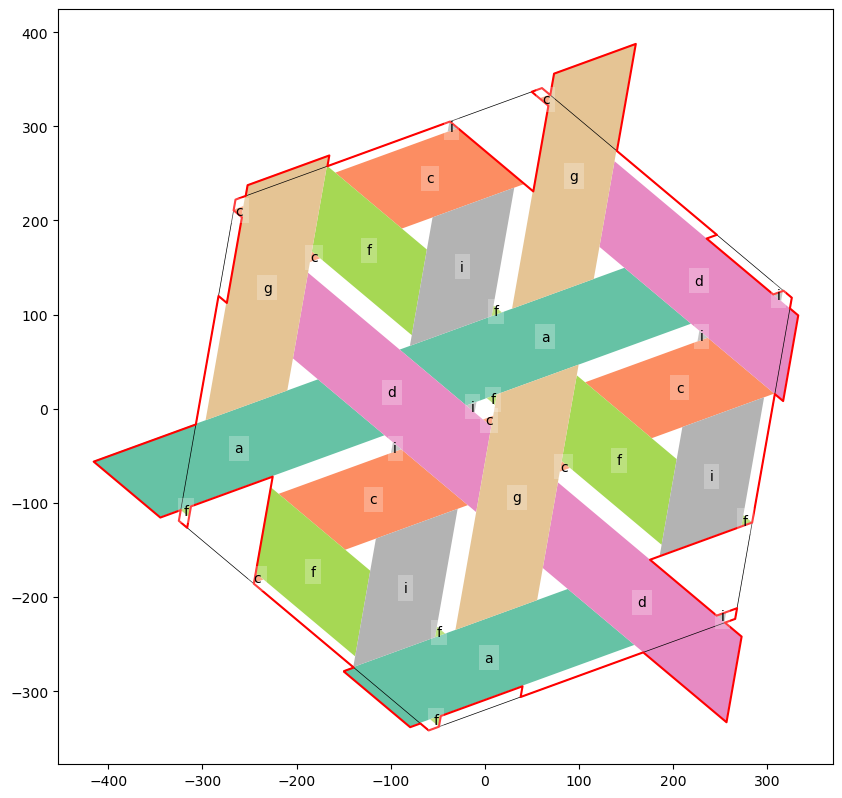

In [8]:
w2 = WeaveUnit(weave_type = "cube", spacing = 100, aspect = .8,
               strands = "a-c|d-f|g-i", crs = ak.crs).transform_rotate(20)#.inset_tiles(1)
w2.plot(r = 0, cmap = "Set2", figsize = (10, 10))

In [9]:
weave2 = Tiling(w2, ak)

Initialising Tiling: 8.33999365568161e-07
Indexing the region: 0.003402290865778923
Forming the region union: 0.16452187532559037
Building the grid: 0.38271949999034405
Making the tiles: 2.0089146667160094
Indexing the tiles: 0.01647370820865035


In [10]:
textile2 = weave2.get_tiled_map(# prioritise_tiles = True, ragged_edges = True,
                                debug = True, join_on_prototiles = False)

STEP 1: prep data (rotation if requested): 0.027
STEP A2: overlay zones with tiling: 0.997
STEP A3: calculate areas: 0.001
STEP A4: drop columns prior to join: 0.001
STEP A5: build lookup for join: 0.635
STEP A6: perform lookup join: 0.007


In [11]:
textile2.vars_to_map = [x for x in ak if "Rank" in x]
textile2.colors_to_use = ("BrBG", "RdGy", "RdYlBu", "Spectral",
                          "PiYG", "PRGn", "PuOr", "viridis")

No tile ids provided: setting all of them!
Setting defaults for the 'categoricals' attribute of the map.


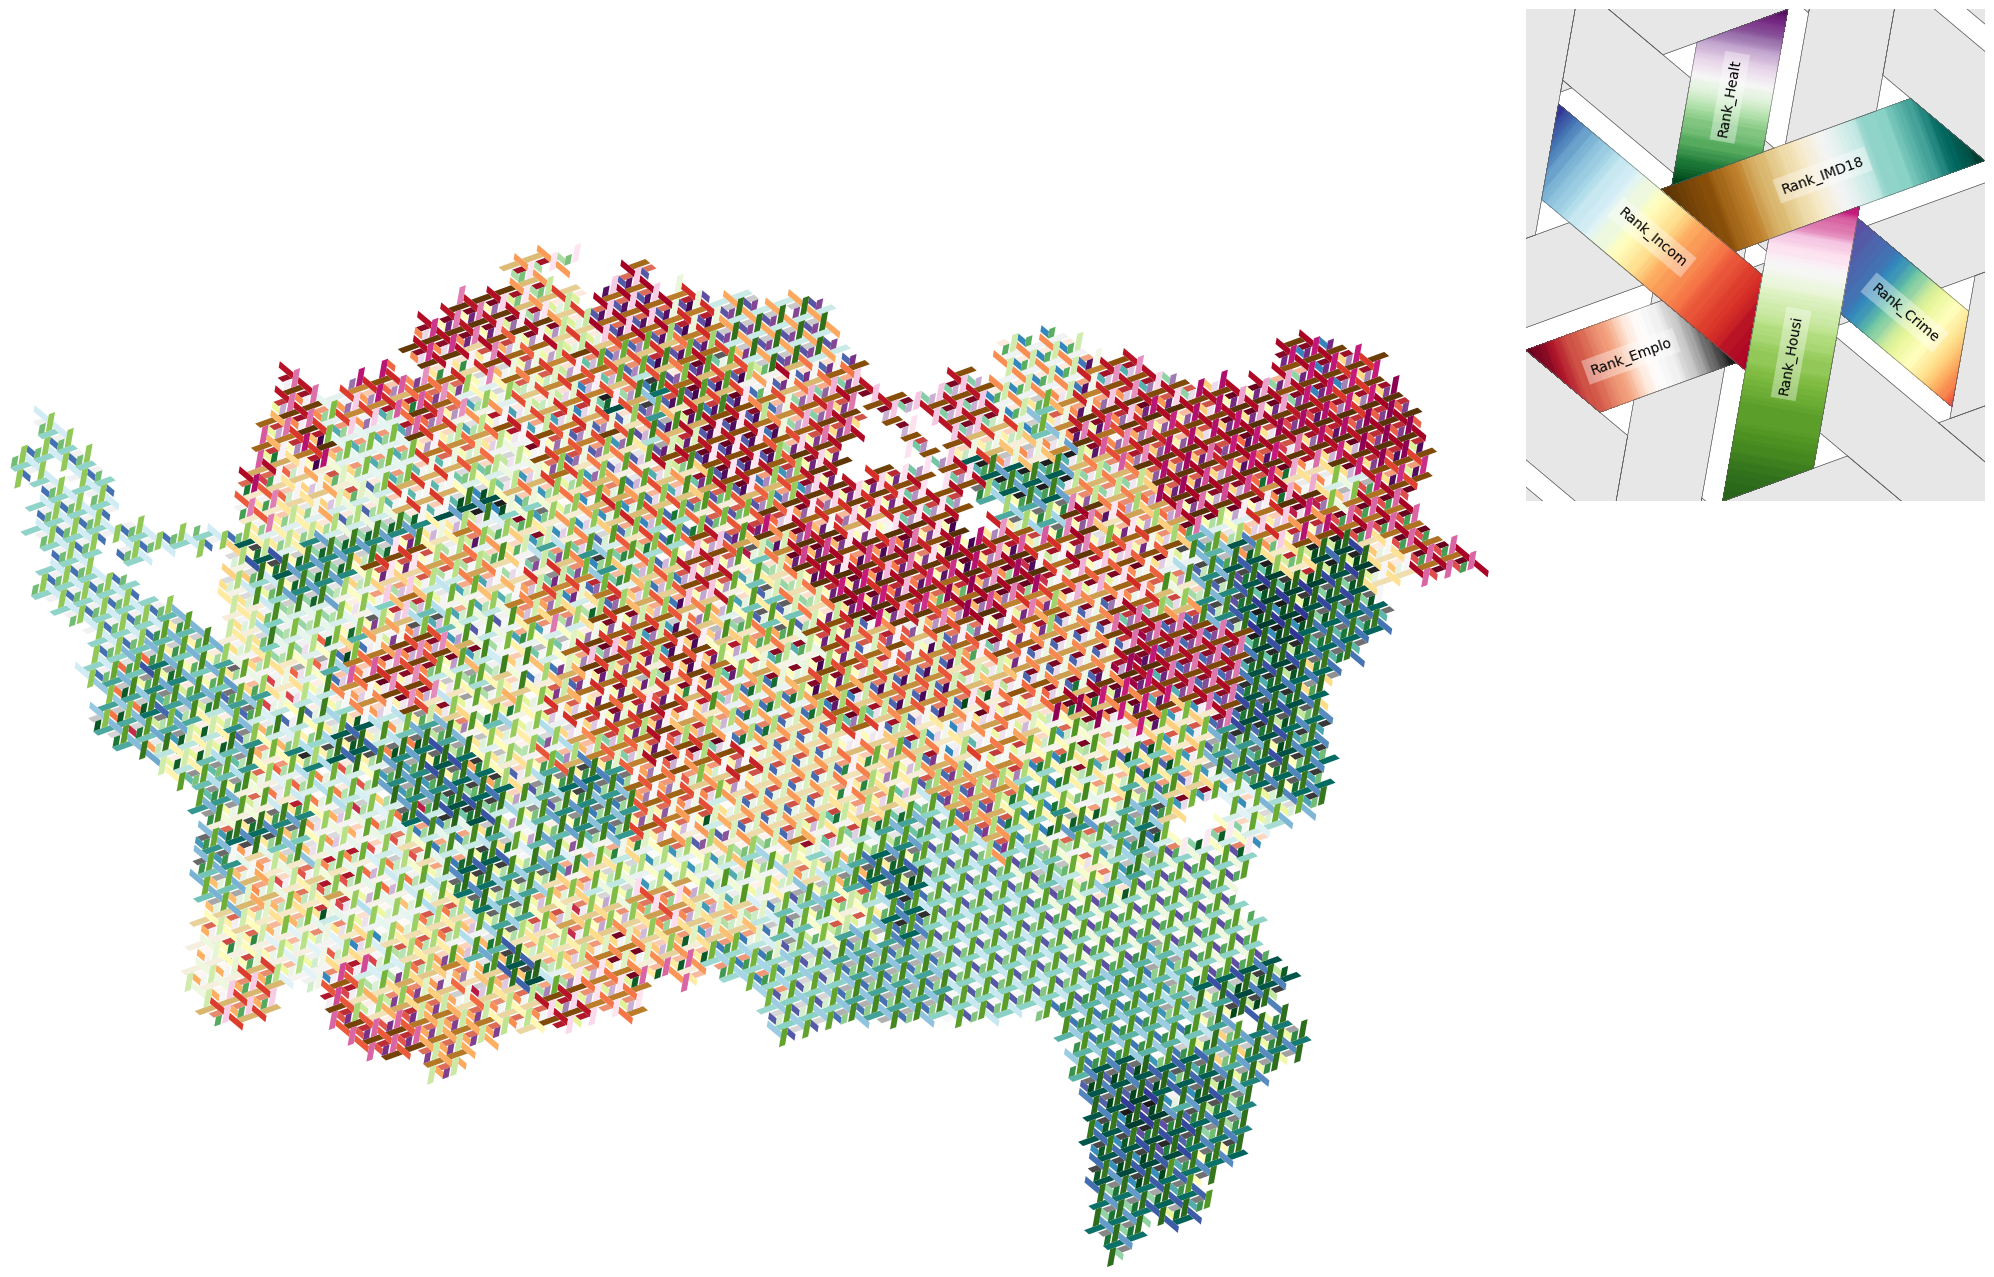

In [12]:
fig = textile2.render(legend = True)